# Biomedical Imaging 4C16/5C16 Project

## Tumor Segmentation & Classification

#### About the dataset

You have been given a dataset of ultrasound scans and segmentation maps associated with these ultrasound scans. These scans are to be used for training networks for ***breast cancer tumor segmentation and classification***.

The dataset has already been prepared to numpy files and is in the 'dataset' directory and is of the following structure:

- *dataset/*
    - *benign/*
        - *input.npy*
        - *target.npy*
    - *malignant/*
        - *input.npy*
        - *target.npy*
    - *normal/*
        - *input.npy*
        - *target.npy*

The *input.npy* and *output.npy* files are the input ultrasound scans and target segmentation maps for that tumor category (benign, malignant, normal).

- All input ultrasound scans are images of size 128x128x3. This means the height and width of these images are 128 and it is stored in RGB space. The pixels range from 0-1.
- All segmentation maps are images of size 128x128x1. This is an image where a value of 1 means that a tumor is detected at that location, and 0 means there is no tumor present.

The code block below displays examples of ultrasound scans and tumor segmentation maps for these image pairs.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/4c16-labs/code/lab-06/

ModuleNotFoundError: No module named 'google.colab'

In [8]:
# Function to save a model
def save_model_to_disk(model, filename_base):
    # save model and weights (don't change the filenames)
    model_json = model.to_json()
    with open(filename_base + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{filename_base}.h5")
    print("Saved model to model.json and weights to model.h5")

In [7]:
# Download the dataset
!curl --create-dirs -o C:/Users/xusong/Desktop/DL/lab6/medicalimaging-dataset.zip https://tcddeeplearning.blob.core.windows.net/deeplearning202324/medicalimaging-dataset.zip

!mkdir -p C:/Users/xusong/Desktop/DL/lab6/medicalimaging/
!unzip C:/Users/xusong/Desktop/DL/lab6/medicalimaging-dataset.zip -d C:/Users/xusong/Desktop/DL/lab6/medicalimaging/

# Dataset is located in /home/tcd/data/medicalimaging/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  7 16.1M    7 1247k    0     0  1657k      0  0:00:09 --:--:--  0:00:09 1659k
 22 16.1M   22 3679k    0     0  2096k      0  0:00:07  0:00:01  0:00:06 2096k
 30 16.1M   30 5088k    0     0  1845k      0  0:00:08  0:00:02  0:00:06 1845k
 40 16.1M   40 6624k    0     0  1764k      0  0:00:09  0:00:03  0:00:06 1764k
 58 16.1M   58 9728k    0     0  2046k      0  0:00:08  0:00:04  0:00:04 2046k
 68 16.1M   68 11.0M    0     0  1960k      0  0:00:08  0:00:05  0:00:03 2006k
 76 16.1M   76 12.4M    0     0  1808k      0  0:00:09  0:00:07  0:00:02 1713k
 83 16.1M   83 13.4M    0     0  1770k      0  0:00:09  0:00:07  0:00:02 1729k
 92 16.1M   92 14.9M    0     0  1749k      0  0:00:09  0:00:08  0:00:01 1738k
100 16.1M  100 16.1M    0     0  1820k      0  0:00

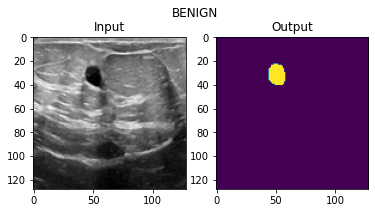

285


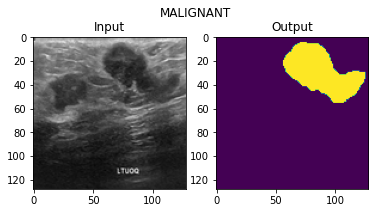

171


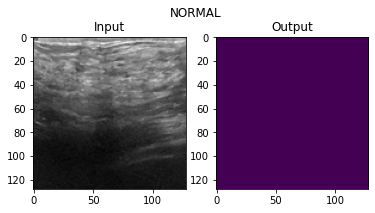

52


In [56]:
# load data
import numpy as np
import matplotlib.pyplot as plt
import random

for _type in ['benign', 'malignant', 'normal']:
    X = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/input.npy')
    y = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/target.npy')
    randomExample = random.randint(0, X.shape[0] - 1)
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(X[randomExample])
    axs[0].title.set_text('Input')
    axs[1].imshow(y[randomExample])
    axs[1].title.set_text('Output')
    fig.suptitle(_type.upper())
    plt.subplots_adjust(top=1.1)
    plt.show()
    print(randomExample)
    
    

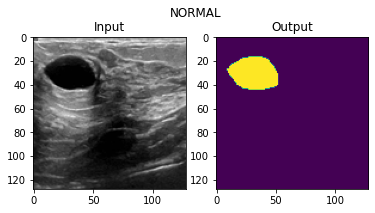

(6681, 128, 128, 3)


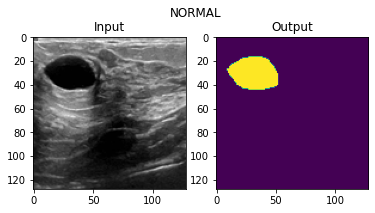

(6681, 128, 128, 3)


In [50]:
    X = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/benign/input.npy')
    y = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/benign/target.npy')
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(X[6670])
    axs[0].title.set_text('Input')
    axs[1].imshow(y[6670])
    axs[1].title.set_text('Output')
    fig.suptitle(_type.upper())
    plt.subplots_adjust(top=1.1)
    plt.show()
    print(X.shape)
    
    con = np.concatenate((X[6670], y[6670]), axis=-1)
    con = tf.keras.layers.RandomRotation(factor=0.2)(con)
    con = tf.keras.layers.RandomRotation(factor=0.2)(con)
    con = tf.keras.layers.RandomRotation(factor=0.3)(con)
    con = tf.keras.layers.RandomRotation(factor=0.3)(con)
    x = con[:,:,:3]
    z = con[:,:,3:]
    #[x, z] = np.split(con_r, [3], axis = -1)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(x)
    axs[0].title.set_text('Input')
    axs[1].imshow(z)
    axs[1].title.set_text('Output')
    fig.suptitle(_type.upper())
    plt.subplots_adjust(top=1.1)
    plt.show()
    print(X.shape)

In [45]:
print(y.dtype)
print(y.shape)

float64
(6681, 128, 128, 1)


### The problem

You are required to train two separate neural networks for the purposes of:

1. **Classification Task**: Predicting whether an ultrasound is a) benign tumor,  b) contains a malignant tumor or c) normal (no-tumor).
    - Input are ultra sound scans (data from benign/malignant/normal), the output is a vector of the 3 probabilities for the classes (benign/malignant/normal) in that order (eg. [0.01, 0.99, 0] means the outcome is more likely to be malignant).
2. **Segmentation Task**: Predicting the segmentation map for a tumor of an input MRI scan if a tumor exists
    - Input are ultra sound scans (data from benign/malignant/normal), output is an image with the same height and width as the input image, but with only one channel and a value of 1 over the location where a tumor is present.

---

*IMPORTANT*

For Task 1, your model should be created with the name: 'classification_model',
the model size should be under 5M

For Task 2, your model should be created with the name: 'segmentation_model',
the model size should be under 3M.

In [1]:
# Hints:
#
# Load data into appropriate input/output formats.
# For example, for problem 1:
#   * inputs should be a collection of images of size [n_samples x height x width x 3],
#   * outputs should be of size [n_samples x height x width x 1].
#
# Load images using the `np.load` function. You can combine tensors using `np.concat`
# to form a single input or output dataset tensor. Look at previous labs for inspiration
# on what datasets look like.
#
# The amount of training data is very low, so usage of data
# augmentation techniques is strongly advised.(eg. see tf.keras.layers.RandomRotation)
#
# Classification Task hint: you may also think of using pre-trained networks
# with fine-tuning.
# Keep the model size under the restriction of 5Million parameters, you should
# be able to hit the target at much less model size. (Lower the better:))
#
# Segmentation Task hint: You might want to use transpose convolution layers to go up in tensor size.
# Popular segmentation architectures include U-Net (with skip-connections) or DnCNN.
# Keep the model size under the restriction of 3 Million parameters, you should
# be able to hit the target at very much lower model size. (Lower the better:))

In [1]:
# Import the necessary modules

import tensorflow as tf

import keras
from keras import datasets
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import PReLU, LeakyReLU, Conv2D, MaxPool2D, Lambda
from keras.regularizers import l2

from keras.models import model_from_json

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import pickle
import sklearn as skl

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from PIL import Image

In [2]:
# Define some useful functions
import tensorflow as tf
from keras.callbacks import Callback
from sklearn.metrics import f1_score
import numpy as np

#class F1ScoreCallback(keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs=None):
#        logs = logs or {}
#        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
#        val_targ = self.validation_data[1]
#        _val_f1 = f1_score(val_targ, val_predict, average='macro')
#        logs['val_f1'] = _val_f1
#        print(f" - val_f1: {_val_f1:.4f}")
        

class PlotF1Score(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.f1 = []
        self.acc = []
        self.losses = []
        self.val_losses = []
        self.val_f1 = []
        self.val_acc = []
        self.logs = []
        self.best_f1 = []
        self.best_weights = None

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(int(self.i))
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.f1.append(logs.get('f1_score'))
        self.val_f1.append(logs.get('val_f1_score'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        if self.val_f1 > self.best_f1:
            self.best_f1 = self.val_f1
            self.best_weights = self.model.get_weights()

        self.i += 1

        clear_output(wait=True)
        plt.figure(figsize=(16, 6))
        plt.plot([1, 2])

        plt.subplot(121)
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="validation loss")
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('Model Loss')
        plt.legend()

        plt.subplot(122)
        plt.plot(self.x, self.f1, label="training f1_score")
        plt.plot(self.x, self.val_f1, label="validation f1_score")
        plt.legend()
        plt.ylabel('f1_score')
        plt.xlabel('epoch')
        plt.title('Model f1_score')



        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show();
  
        
class PlotLossAccuracy(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.acc = []
        self.losses = []
        self.val_losses = []
        self.val_acc = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(int(self.i))
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        self.i += 1

        clear_output(wait=True)
        plt.figure(figsize=(16, 6))
        plt.plot([1, 2])
        plt.subplot(121)
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="validation loss")
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('Model Loss')
        plt.legend()
        
        plt.subplot(122)
        plt.plot(self.x, self.acc, label="training accuracy")
        plt.plot(self.x, self.val_acc, label="validation accuracy")
        plt.legend()
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.title('Model Accuracy')
        plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show();


In [3]:
# processing dataset
for _type in ['benign', 'malignant', 'normal']:
    X = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/input.npy')
    Y = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/target.npy')
    X_origin = X
    Y_origin = Y
    for i in range(0, 20):
        x = np.zeros(X_origin.shape)
        y = np.zeros(Y_origin.shape)
        con = np.concatenate((X_origin, Y_origin), axis=-1)
        con_r = np.zeros(con.shape)
        for j in range(0, X_origin.shape[0] - 1):
            con_r = tf.keras.layers.RandomRotation(factor=0.5)(con[j])
            x[j] = con_r[:,:,:3]
            y[j] = con_r[:,:,3:]
        X = np.concatenate((X, x), axis = 0)
        Y = np.concatenate((Y, y), axis = 0)
    X = np.concatenate((X, X_origin), axis = 0)
    Y = np.concatenate((Y, Y_origin), axis = 0)
    print(_type)
    print(X.shape)
    print(Y.shape)
    np.save(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/input.npy', X)
    np.save(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/target.npy', Y)

benign
(8646, 128, 128, 3)
(8646, 128, 128, 1)
malignant
(4158, 128, 128, 3)
(4158, 128, 128, 1)
normal
(2618, 128, 128, 3)
(2618, 128, 128, 1)


(15114, 128, 128, 3)


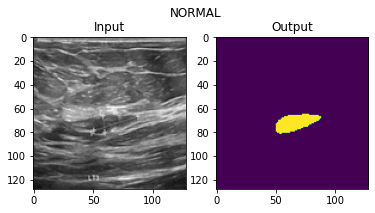

(15114, 128, 128, 3)


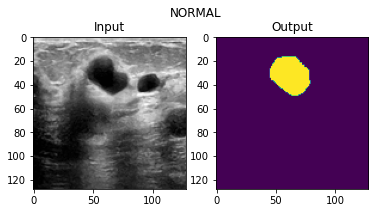

(15114, 128, 128, 3)


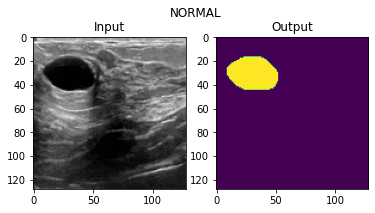

(15114, 128, 128, 3)


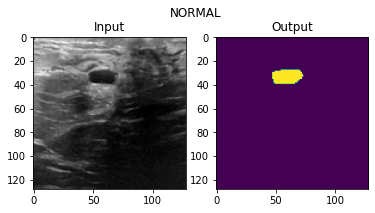

(15114, 128, 128, 3)


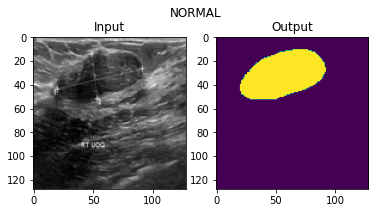

(15114, 128, 128, 3)


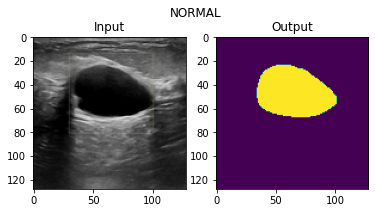

(15114, 128, 128, 3)


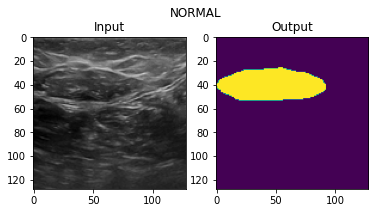

(15114, 128, 128, 3)


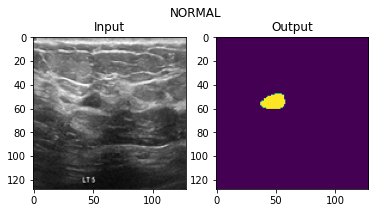

(15114, 128, 128, 3)


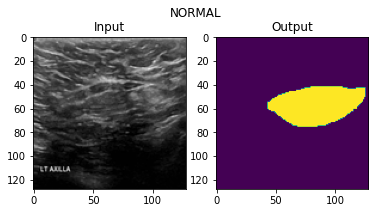

(15114, 128, 128, 3)


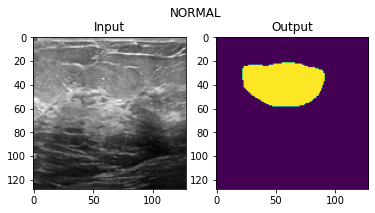

(15114, 128, 128, 3)


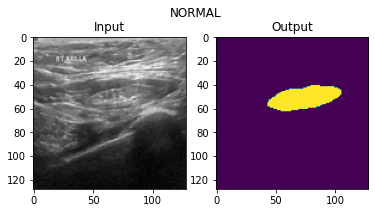

(15114, 128, 128, 3)


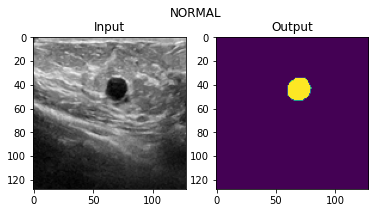

(15114, 128, 128, 3)


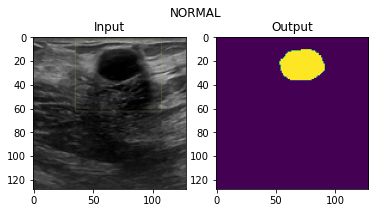

(15114, 128, 128, 3)


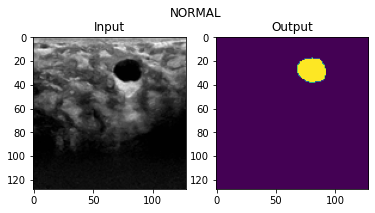

(15114, 128, 128, 3)


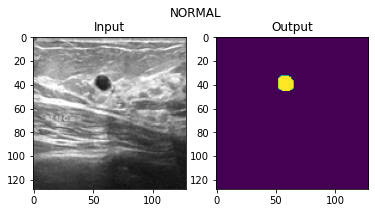

(15114, 128, 128, 3)


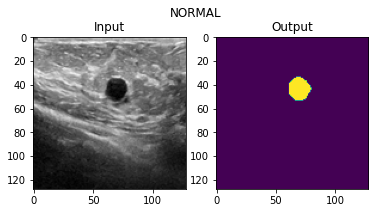

(15114, 128, 128, 3)


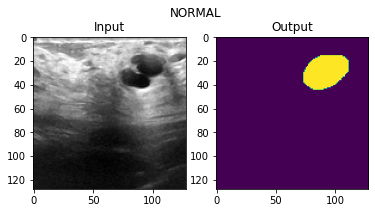

(15114, 128, 128, 3)


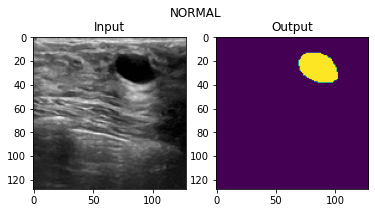

(15114, 128, 128, 3)


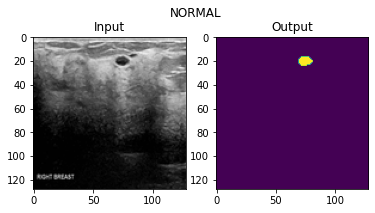

(15114, 128, 128, 3)


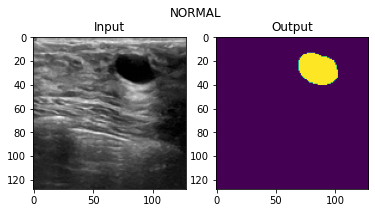

(15114, 128, 128, 3)


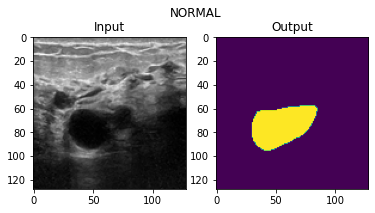

(15114, 128, 128, 3)


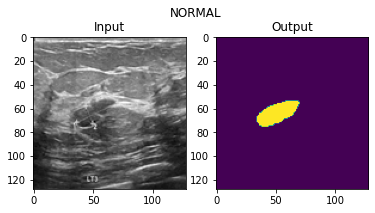

(15114, 128, 128, 3)


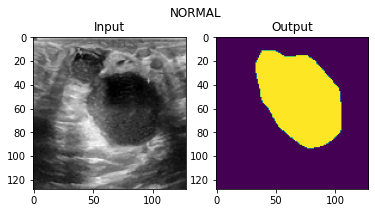

(15114, 128, 128, 3)


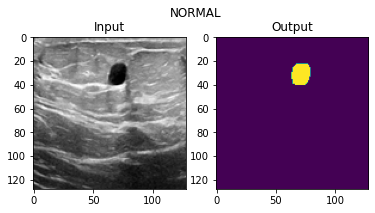

(15114, 128, 128, 3)


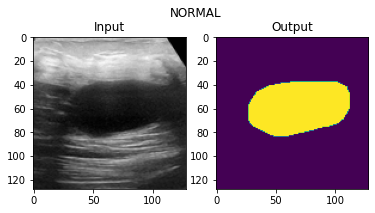

(15114, 128, 128, 3)


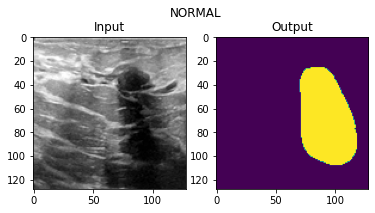

(15114, 128, 128, 3)


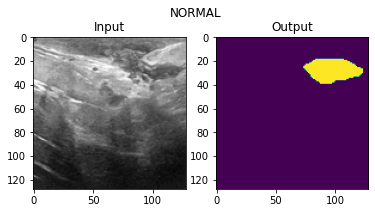

(15114, 128, 128, 3)


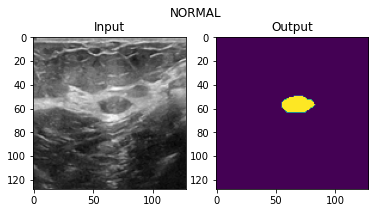

(15114, 128, 128, 3)


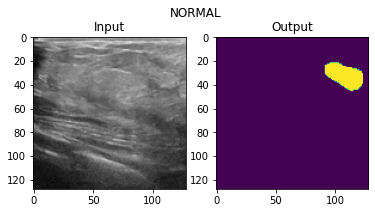

(15114, 128, 128, 3)


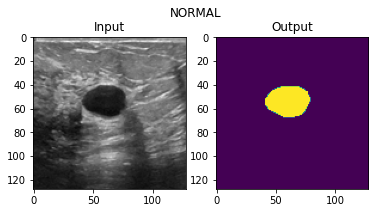

(15114, 128, 128, 3)


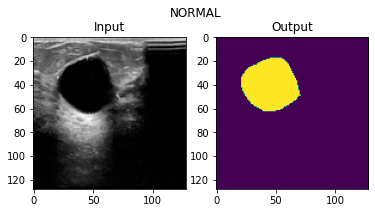

(15114, 128, 128, 3)


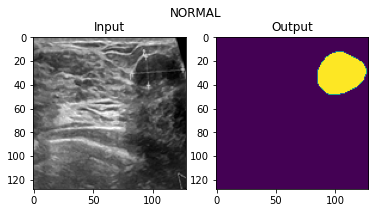

(15114, 128, 128, 3)


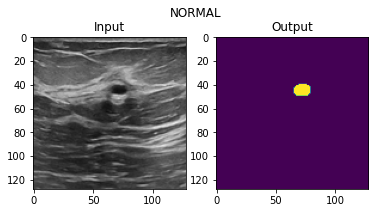

(15114, 128, 128, 3)


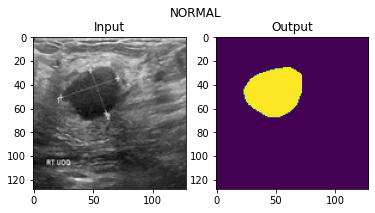

(15114, 128, 128, 3)


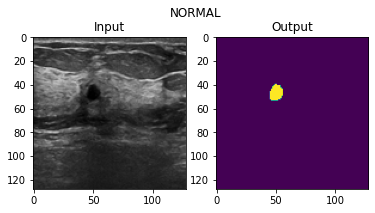

(15114, 128, 128, 3)


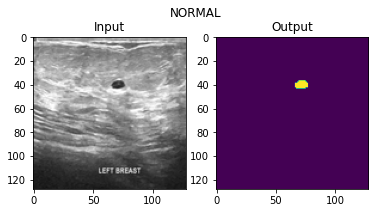

(15114, 128, 128, 3)


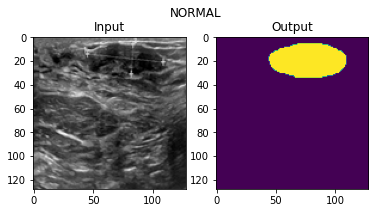

(15114, 128, 128, 3)


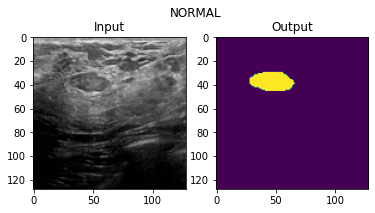

(15114, 128, 128, 3)


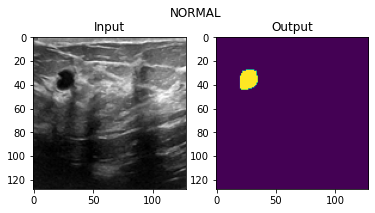

(15114, 128, 128, 3)


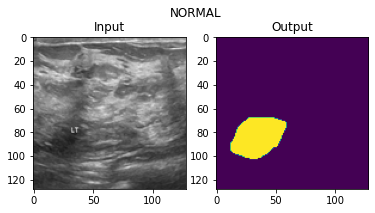

(15114, 128, 128, 3)


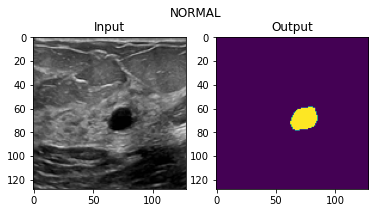

(15114, 128, 128, 3)


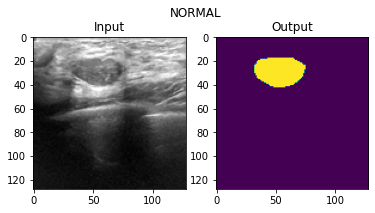

(15114, 128, 128, 3)


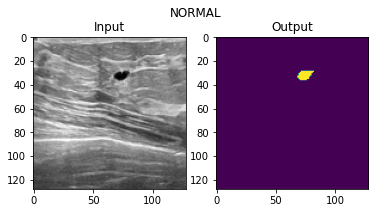

(15114, 128, 128, 3)


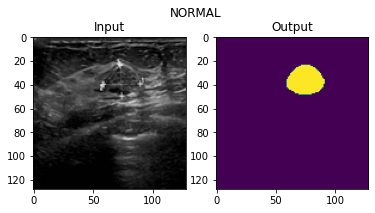

(15114, 128, 128, 3)


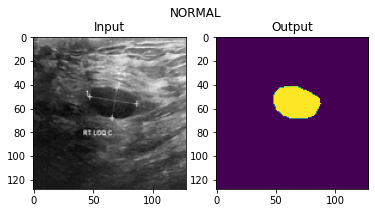

(15114, 128, 128, 3)


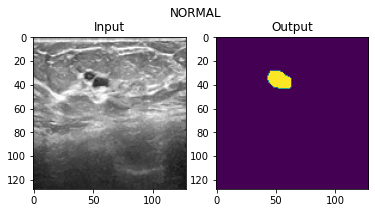

(15114, 128, 128, 3)


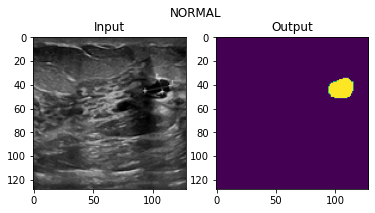

(15114, 128, 128, 3)


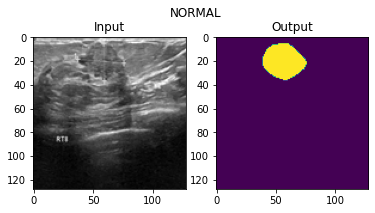

(15114, 128, 128, 3)


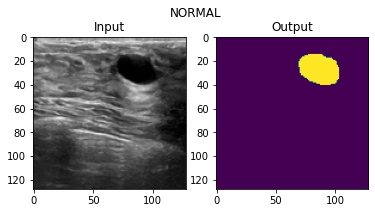

(15114, 128, 128, 3)


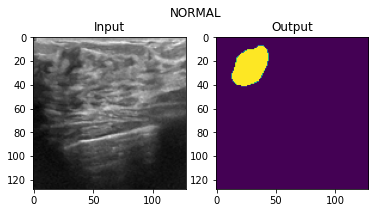

(15114, 128, 128, 3)


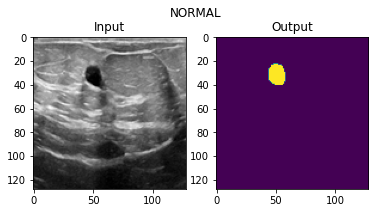

(15114, 128, 128, 3)


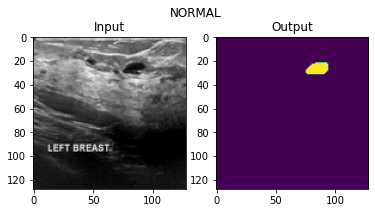

(15114, 128, 128, 3)


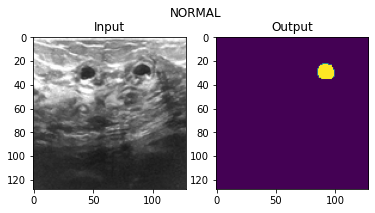

(15114, 128, 128, 3)


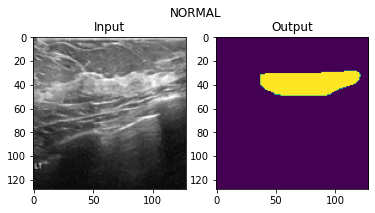

(15114, 128, 128, 3)


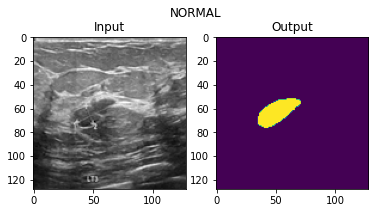

(15114, 128, 128, 3)


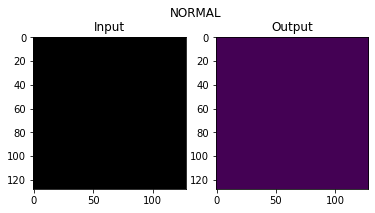

(15114, 128, 128, 3)


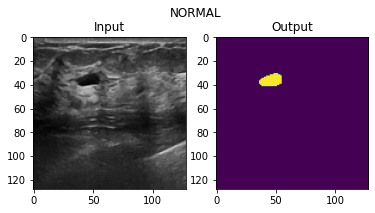

(15114, 128, 128, 3)


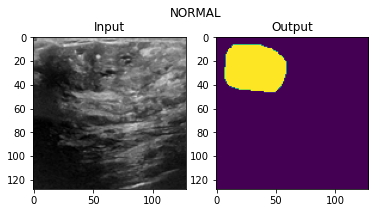

(15114, 128, 128, 3)


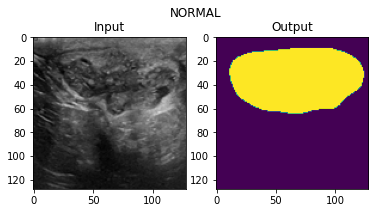

(15114, 128, 128, 3)


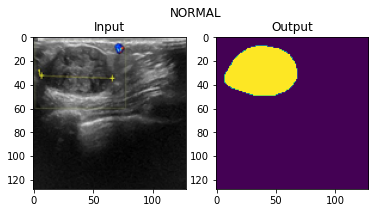

(15114, 128, 128, 3)


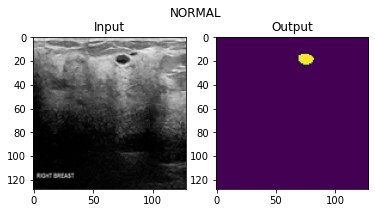

(15114, 128, 128, 3)


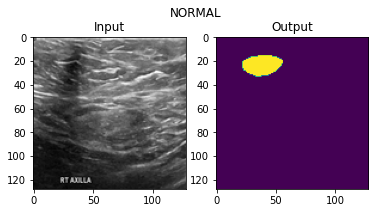

(15114, 128, 128, 3)


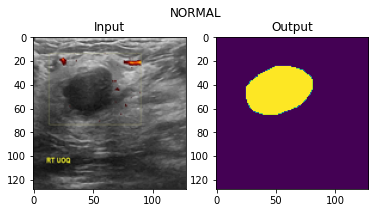

(15114, 128, 128, 3)


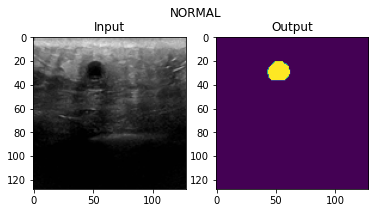

(15114, 128, 128, 3)


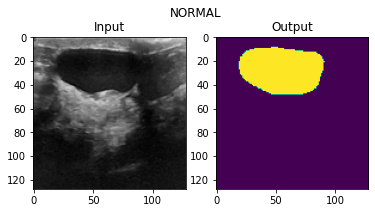

(15114, 128, 128, 3)


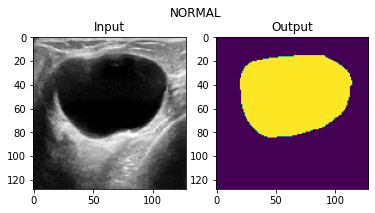

(15114, 128, 128, 3)


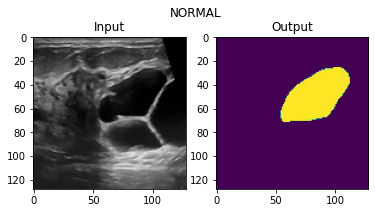

(15114, 128, 128, 3)


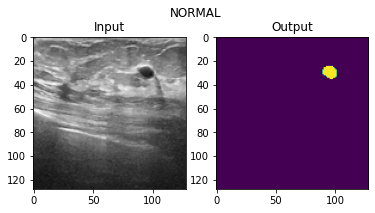

(15114, 128, 128, 3)


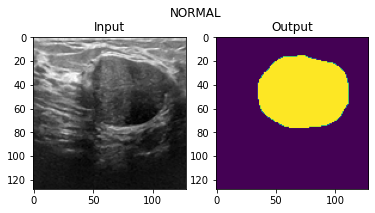

(15114, 128, 128, 3)


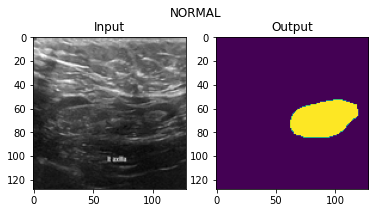

(15114, 128, 128, 3)


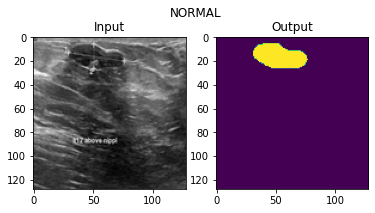

(15114, 128, 128, 3)


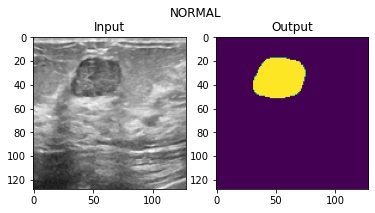

(15114, 128, 128, 3)


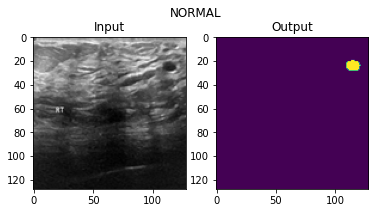

(15114, 128, 128, 3)


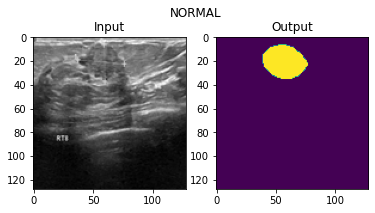

(15114, 128, 128, 3)


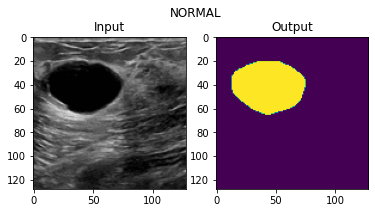

(15114, 128, 128, 3)


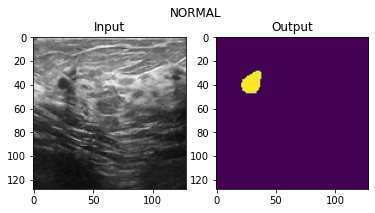

(15114, 128, 128, 3)


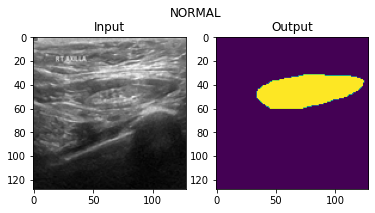

(15114, 128, 128, 3)


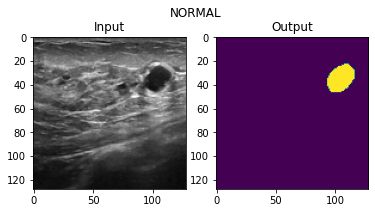

(15114, 128, 128, 3)


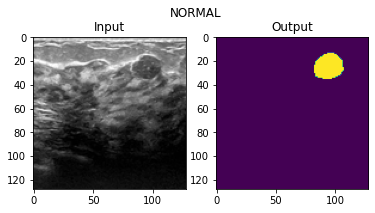

(15114, 128, 128, 3)


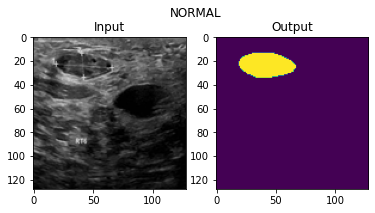

(15114, 128, 128, 3)


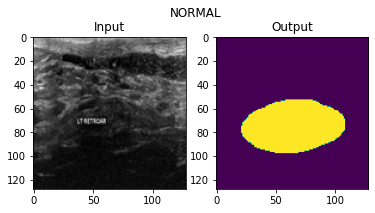

(15114, 128, 128, 3)


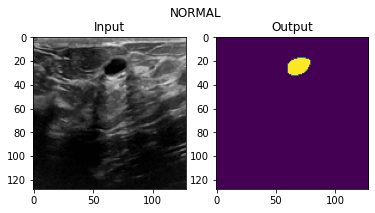

(15114, 128, 128, 3)


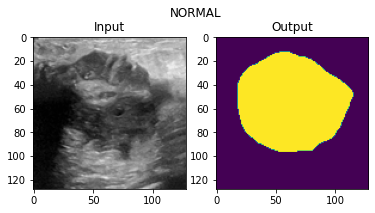

(15114, 128, 128, 3)


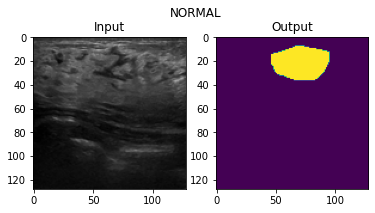

(15114, 128, 128, 3)


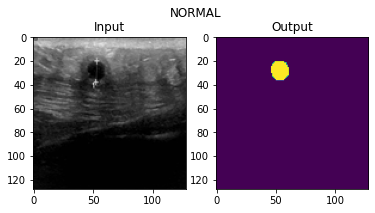

(15114, 128, 128, 3)


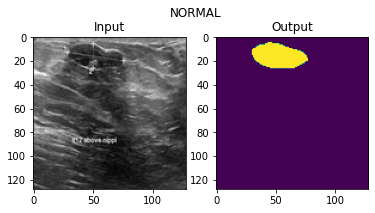

(15114, 128, 128, 3)


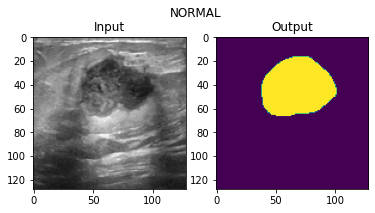

(15114, 128, 128, 3)


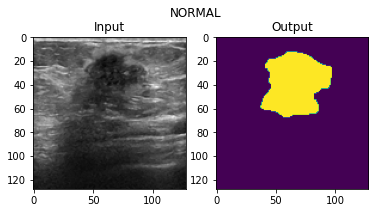

(15114, 128, 128, 3)


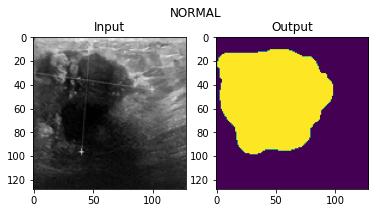

(15114, 128, 128, 3)


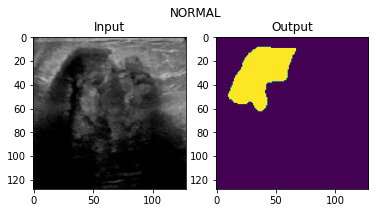

(15114, 128, 128, 3)


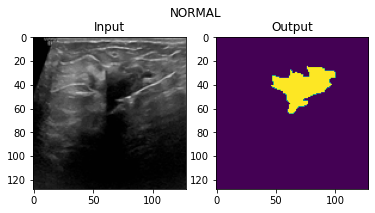

(15114, 128, 128, 3)


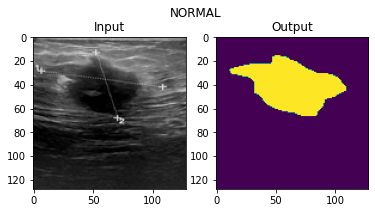

(15114, 128, 128, 3)


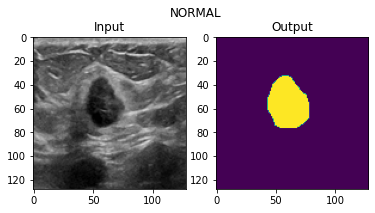

(15114, 128, 128, 3)


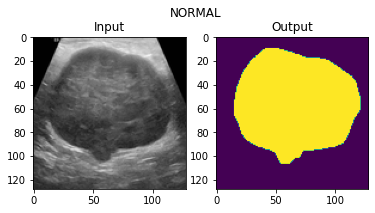

(15114, 128, 128, 3)


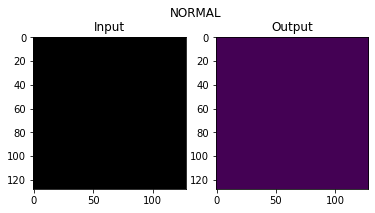

(15114, 128, 128, 3)


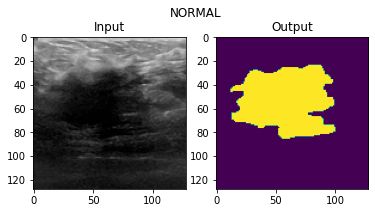

(15114, 128, 128, 3)


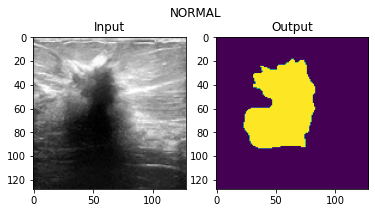

(15114, 128, 128, 3)


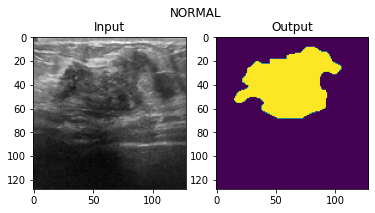

(15114, 128, 128, 3)


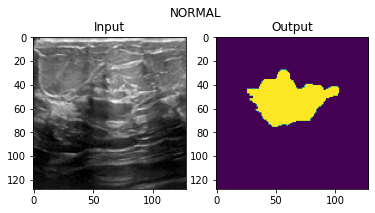

(15114, 128, 128, 3)


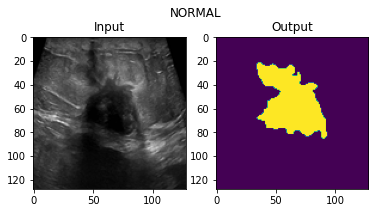

(15114, 128, 128, 3)


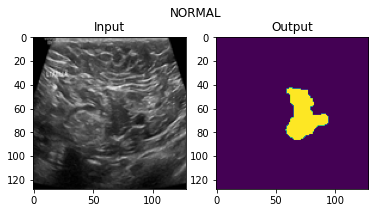

(15114, 128, 128, 3)


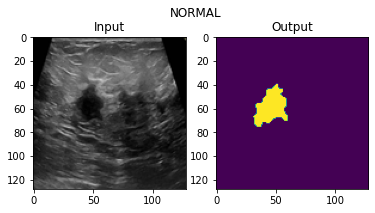

(15114, 128, 128, 3)


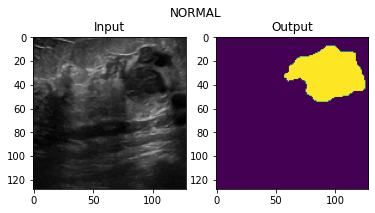

(15114, 128, 128, 3)


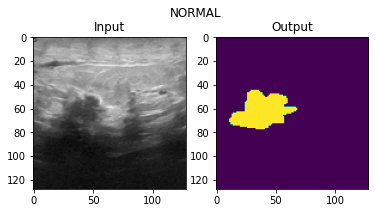

(15114, 128, 128, 3)


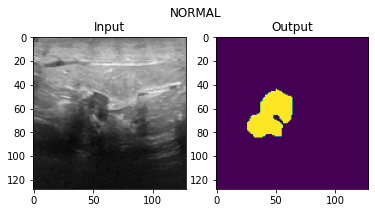

(15114, 128, 128, 3)


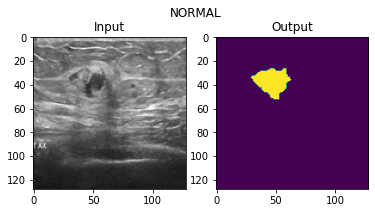

(15114, 128, 128, 3)


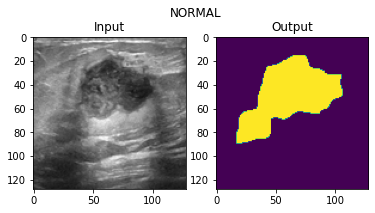

(15114, 128, 128, 3)


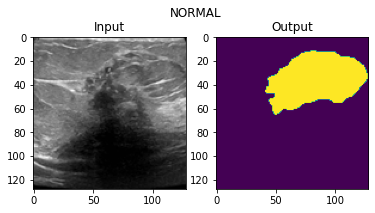

(15114, 128, 128, 3)


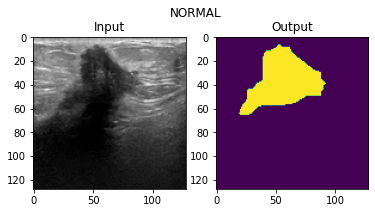

(15114, 128, 128, 3)


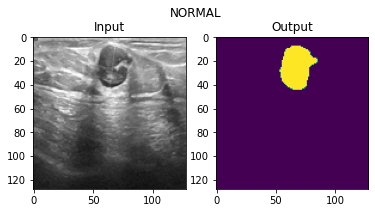

(15114, 128, 128, 3)


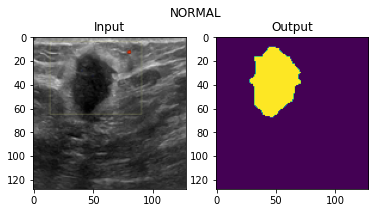

(15114, 128, 128, 3)


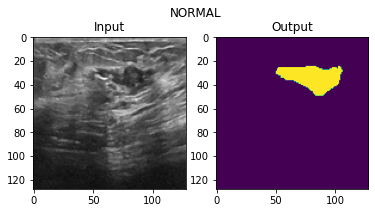

(15114, 128, 128, 3)


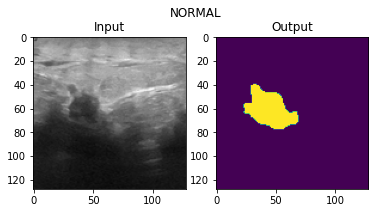

(15114, 128, 128, 3)


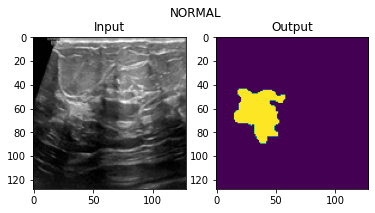

(15114, 128, 128, 3)


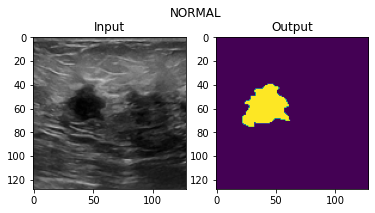

(15114, 128, 128, 3)


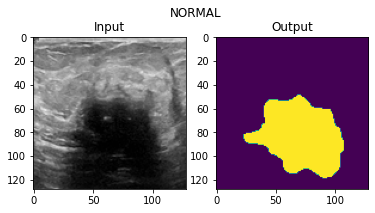

(15114, 128, 128, 3)


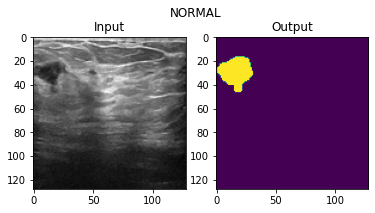

(15114, 128, 128, 3)


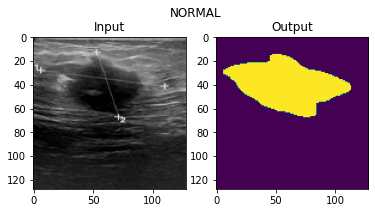

(15114, 128, 128, 3)


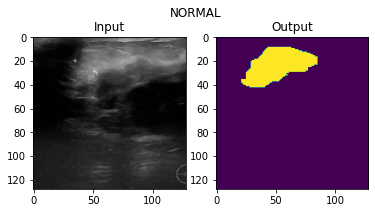

(15114, 128, 128, 3)


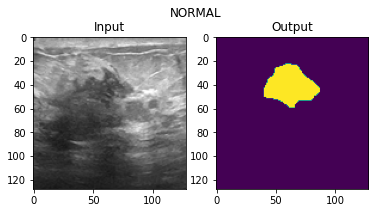

(15114, 128, 128, 3)


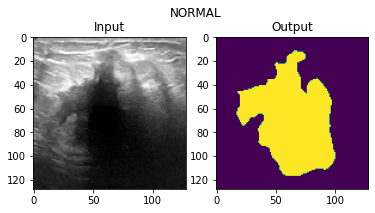

(15114, 128, 128, 3)


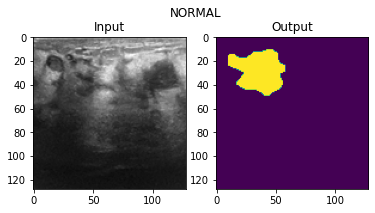

(15114, 128, 128, 3)


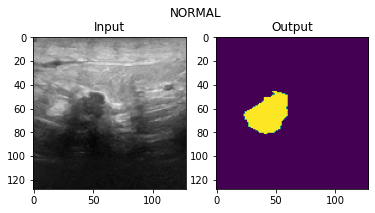

(15114, 128, 128, 3)


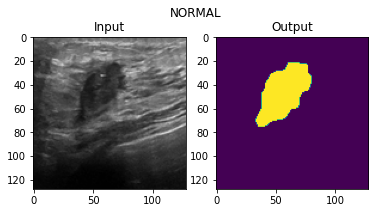

(15114, 128, 128, 3)


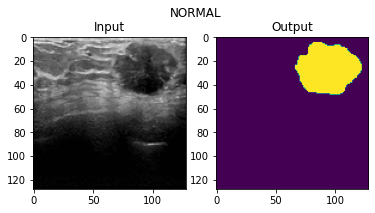

(15114, 128, 128, 3)


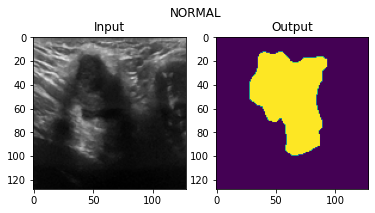

(15114, 128, 128, 3)


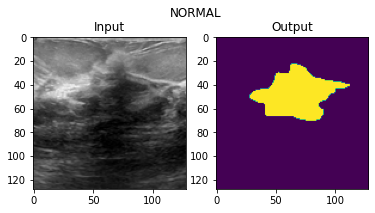

(15114, 128, 128, 3)


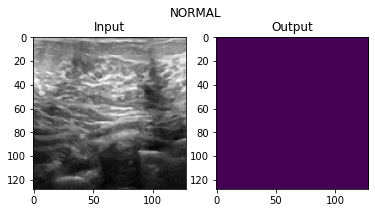

(15114, 128, 128, 3)


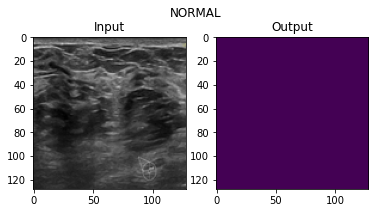

(15114, 128, 128, 3)


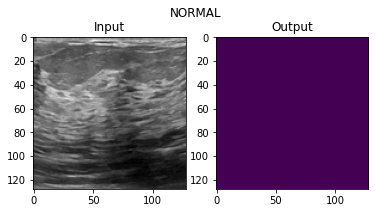

(15114, 128, 128, 3)


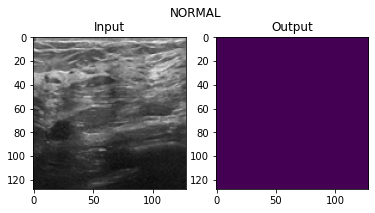

(15114, 128, 128, 3)


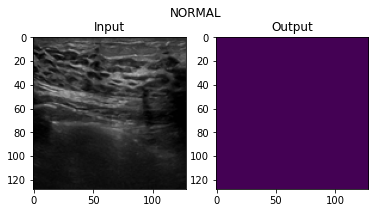

(15114, 128, 128, 3)


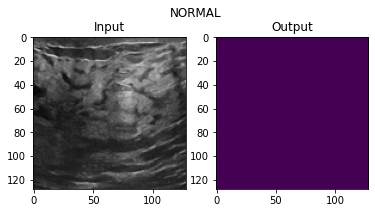

(15114, 128, 128, 3)


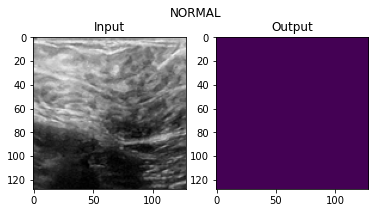

(15114, 128, 128, 3)


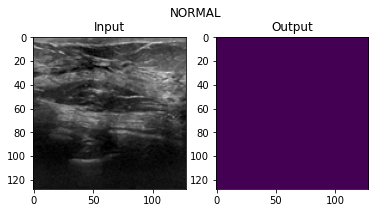

(15114, 128, 128, 3)


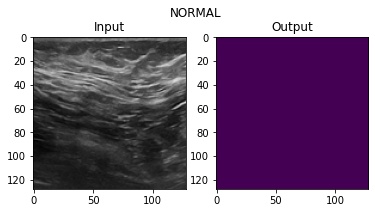

(15114, 128, 128, 3)


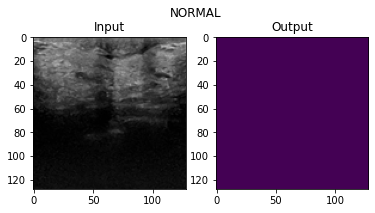

(15114, 128, 128, 3)


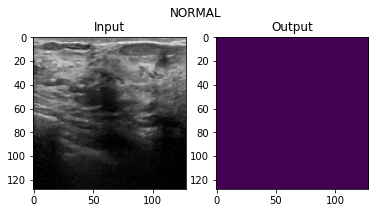

(15114, 128, 128, 3)


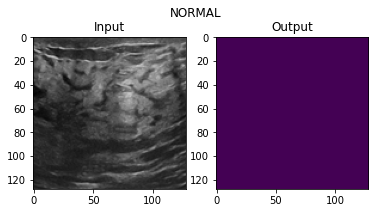

(15114, 128, 128, 3)


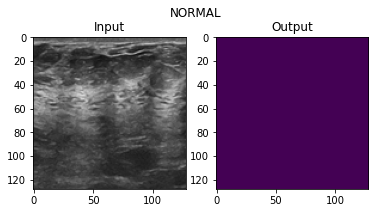

(15114, 128, 128, 3)


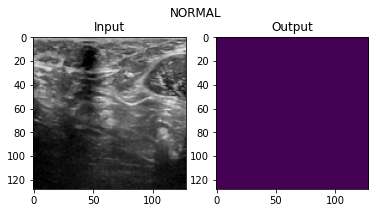

(15114, 128, 128, 3)


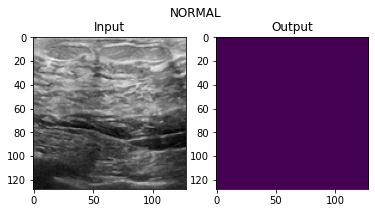

(15114, 128, 128, 3)


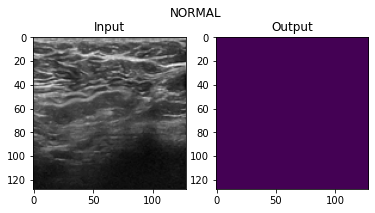

(15114, 128, 128, 3)


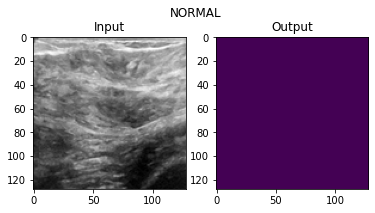

(15114, 128, 128, 3)


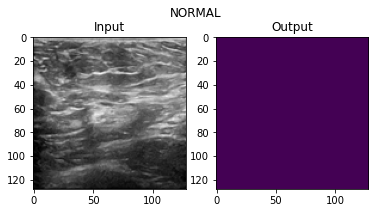

(15114, 128, 128, 3)


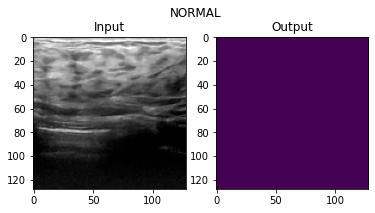

(15114, 128, 128, 3)


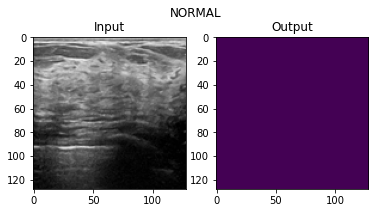

(15114, 128, 128, 3)


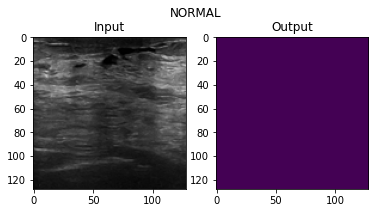

(15114, 128, 128, 3)


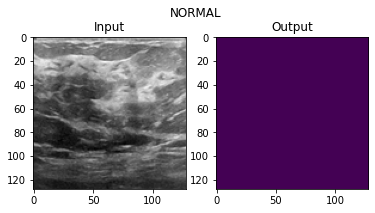

(15114, 128, 128, 3)


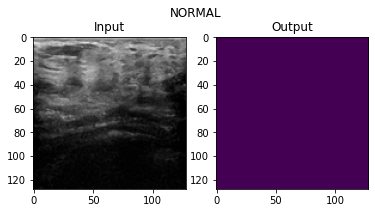

(15114, 128, 128, 3)


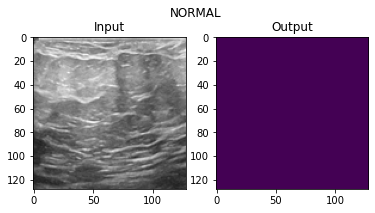

(15114, 128, 128, 3)


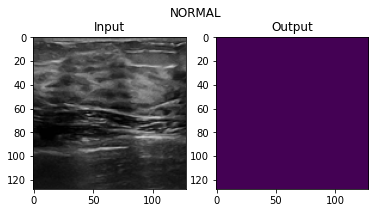

(15114, 128, 128, 3)


In [68]:
print(X.shape)
for j in range(1, X.shape[0] - 1,100):
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(X[j])
        axs[0].title.set_text('Input')
        axs[1].imshow(Y[j])
        axs[1].title.set_text('Output')
        fig.suptitle(_type.upper())
        plt.subplots_adjust(top=1.1)
        plt.show()
        print(X.shape)
        

In [3]:
# load training set
# y(128, 128, 1) -> y(3)
benign = [1, 0, 0]
malignant = [0, 1, 0]
normal = [0, 0, 1]

i = 0
for _type in ['benign', 'malignant', 'normal']:
    x = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/input.npy')
    y = np.load(f'C:/Users/xusong/Desktop/DL/lab6/medicalimaging/dataset/{_type}/target.npy')
    x = x.astype('float32')
    y = y.astype('float32')

    x_type = np.zeros((x.shape[0], 3))
    
    if _type == 'benign':
        x_type[:] = benign
    elif _type == 'malignant':
        x_type[:] = malignant
    elif _type == 'normal':
        x_type[:] = normal

    if i==0:
      X = x
      Y = y
      X_type = x_type
    else:
      X = np.concatenate((X, x), axis = 0)
      Y = np.concatenate((Y, y), axis = 0)
      X_type = np.concatenate((X_type, x_type), axis = 0)
    print(_type)

    i = i + 1
del(x)
del(y)
del(x_type)
print(X.shape)
print(Y.shape)
print(X_type.shape)


benign
malignant
normal
(15422, 128, 128, 3)
(15422, 128, 128, 1)
(15422, 3)


In [53]:
# Classification

X_train, X_validation, Y_train, Y_validation = skl.model_selection.train_test_split(X, X_type, test_size=.1)
inputs = keras.layers.Input(shape=(128, 128, 3))
layer = keras.layers.Dropout(0.2)
#random_rotation_layer = tf.keras.layers.RandomRotation(factor=0.2)

x = inputs  # Don't flatten until after your 2D layers
#x = random_rotation_layer(x)
...
# put here some convolutional layers;
# see keras docs for Conv2D, MaxPool2D, etc.
# Maybe stick in some Dropout as well?
x = keras.layers.Conv2D(32, 5, padding = "same", activation = 'relu', bias_regularizer = 'l2')(x)
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
x = layer(x)

x = keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(x)
x = keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)
x = layer(x)

x = keras.layers.Conv2D(128, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(x)
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
x = layer(x)

x = keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(x)
x = keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)
x = layer(x)

x = keras.layers.Conv2D(32, 5, padding = "same", activation = 'relu', bias_regularizer = 'l2')(x)
x = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
x = layer(x)

#x = keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)


# The last layers of your model should look something like
# this to be well-structured for the final classification:
x = Flatten()(x)
x = Dense(64, activation = 'relu', bias_regularizer = 'l2')(x);
x = layer(x)
x = Dense(32, activation = 'relu', bias_regularizer = 'l2')(x);
x = layer(x)
... # a few other dense layers?
predictions = Dense(3, activation='softmax')(x)  # There are 3 classes in this problem, hence the '3'.



# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary.
model.summary()

# Keep things sane.
if (model.count_params() > 5000000):
    raise Exception("Your model is unecessarily complex, scale down!")

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 128, 128, 32  2432        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 64, 64, 32)  0           ['conv2d_23[0][0]']              
 )                                                                                          

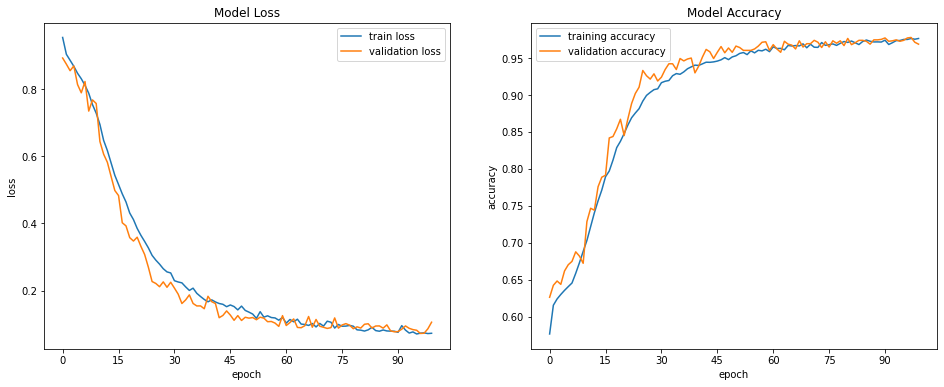

217/217 [==============================] - 6s 29ms/step - loss: 0.0727 - accuracy: 0.9766 - val_loss: 0.1056 - val_accuracy: 0.9689


In [54]:
# Train Classification
from keras.callbacks import ModelCheckpoint

num_epochs = 100
# Create an instance of our callback functions class, to plot our loss function and accuracy with each epoch.
pltCallBack = PlotLossAccuracy()
# Run the training.
model.fit(X_train, Y_train,
          batch_size=64, epochs=num_epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[pltCallBack])

In [55]:
classification_model = model
print(classification_model.count_params())
if (classification_model.count_params()  < 5000000) :
  save_model_to_disk(classification_model, "classification_model")
else:
  print("Your model is unecessarily complex, scale down!")

254819
Saved model to model.json and weights to model.h5


In [4]:
# Segmentation
X, X_validation, Y, Y_validation = skl.model_selection.train_test_split(X, Y, test_size=.1)

In [5]:
# Segmentation
from keras import backend as backend
from tensorflow.keras.layers import concatenate
inputs = keras.layers.Input(shape=(128, 128, 3))
dropout = keras.layers.Dropout(0.2)
#random_rotation_layer = tf.keras.layers.RandomRotation(factor=0.2)

x = inputs  # Don't flatten until after your 2D layers
#x = random_rotation_layer(x)
...
# put here some convolutional layers;
# see keras docs for Conv2D, MaxPool2D, etc.
# Maybe stick in some Dropout as well?
conv1 = keras.layers.Conv2D(32, 5, padding = "same", activation = 'relu', bias_regularizer = 'l2')(x)# 128,128,32
pooling1 = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(conv1)# 64,64,32
drop1 = dropout(pooling1)

# 64,64,32
conv2 = keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(drop1)# 64,64,64
pooling2 = keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(conv2)# 32,32,64
drop2 = dropout(pooling2)

# 32,32,64
conv3 = keras.layers.Conv2D(128, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(drop2)# 32,32,128
pooling3 = keras.layers.MaxPooling2D((2, 2), strides=(2, 2))(conv3)# 16,16,128
drop3 = dropout(pooling3)


# 16,16,128

conv4 = keras.layers.Conv2D(128, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(drop3)# 16,16,256
conv5 = keras.layers.Conv2D(128, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(conv4)# 16,16,256

# 16,16,256
up1 = keras.layers.UpSampling2D(size=(2, 2))(drop5)# 32,32,256
merge1 = concatenate([drop2, up1], axis=3)# 32,32,320
conv6 = keras.layers.Conv2D(128, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(merge1)# 32,32,128
drop6 = dropout(conv6)

up2 = keras.layers.UpSampling2D(size=(2, 2))(drop6)# 64,64,128
merge2 = concatenate([drop1, up2], axis=3)# 64,64,160
conv7 = keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu', bias_regularizer = 'l2')(merge2)# 64,64,64
drop7 = dropout(conv7)

up3 = keras.layers.UpSampling2D(size=(2, 2))(drop7)# 128,128,64
merge3 = concatenate([conv1, up3], axis=3)#128,128,67
conv8 = keras.layers.Conv2D(32, 5, padding = "same", activation = 'relu', bias_regularizer = 'l2')(merge3)#128,128,32
drop8 = dropout(conv8)


out = drop8
#x = keras.layers.AveragePooling2D((2, 2), strides=(2, 2))(x)


... # a few other dense layers?
predictions = keras.layers.Conv2D(1, 1, activation = 'sigmoid')(out)



# Create the model.
model = keras.models.Model(inputs=inputs, outputs=predictions)
opt = keras.optimizers.SGD(learning_rate=0.02, decay=1e-6, momentum=0.9, nesterov=True)


# compute f1 score
def f1_score(y_true, y_pred):
    TP = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    actual_positives = backend.sum(backend.round(backend.clip(y_true, 0, 1)))
    predicted_positives = backend.sum(backend.round(backend.clip(y_pred, 0, 1)))

    precision = TP / (predicted_positives + backend.epsilon())
    recall = TP / (actual_positives + backend.epsilon())

    f1_val = 2 * (precision * recall) / (precision + recall + backend.epsilon())
    return f1_val

# using dice loss
def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    dice = numerator / (denominator + backend.epsilon())
    return 1 - dice


# Setup the optimisation strategy.
model.compile(optimizer=opt,
              loss=dice_loss,
              metrics=[f1_score])

# Display a summary.
model.summary()

# Keep things sane.
if (model.count_params() > 5000000):
    raise Exception("Your model is unecessarily complex, scale down!")

NameError: name 'drop5' is not defined

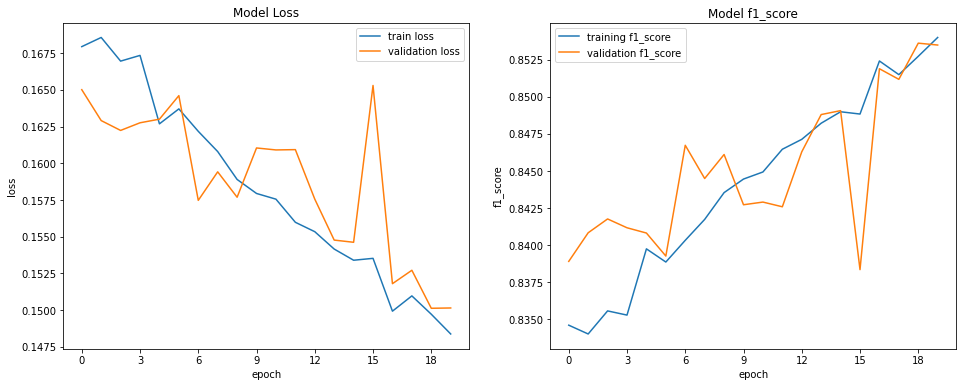

139/139 [==============================] - 28s 204ms/step - loss: 0.1484 - f1_score: 0.8540 - val_loss: 0.1501 - val_f1_score: 0.8535


In [11]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from keras import backend as K
from tensorflow.keras.layers import concatenate


def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - numerator / (denominator + tf.keras.backend.epsilon())

opt = keras.optimizers.SGD(learning_rate=0.05, decay=1e-6, momentum=0.9, nesterov=True)


def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

# Load the json file that contains the model's structure
with open('segmentation_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create a model from the json configuration
model = model_from_json(loaded_model_json)

# Load the weights into the model
model.load_weights('segmentation_model.h5')

model.compile(optimizer=opt,
              loss=dice_loss,
              metrics=[f1_score])

# Create an instance of our callback functions class, to plot our loss function and accuracy with each epoch.
f1_callback = PlotF1Score()
num_epochs = 20
# Run the training.
with tf.device('/GPU:1'):
    model.fit(X, Y,
          batch_size=100, epochs=num_epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[f1_callback])

In [11]:
import tensorflow

tf.__version__


In [12]:
segmentation_model = model

if (segmentation_model.count_params()  < 3000000) :
  save_model_to_disk(segmentation_model, "segmentation_model")
else:
  print("Your model is unecessarily complex, scale down!")

Saved model to model.json and weights to model.h5
